In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, ConfusionMatrixDisplay


In [23]:
np.random.seed(77)
buses = pd.DataFrame({
    'bus_id': ['Bus_'+str(i) for i in range(1,11)],
    'driver_name': [f'Driver_{i}' for i in range(1,11)],
    'avg_speed_kmh': np.random.normal(50, 8, 10).round(1),
    'route_risk_level': np.random.choice(['Low','Medium','High'], size=10, p=[0.4,0.4,0.2]),
    'gps_deviations': np.random.poisson(1.5, 10),
    'late_arrivals': np.random.randint(0, 5, 10)
})
buses['route_risk_level'] = pd.Categorical(buses['route_risk_level'], categories=['Low','Medium','High'], ordered=True)


In [24]:
# Assign safety score
buses['safety_score'] = 100 - (buses['gps_deviations']*5 + buses['late_arrivals']*4)
buses['status'] = np.where(buses['safety_score'] < 70, 'Investigate', 'Safe')

print("\n✅ Transport Data Sample:")
display(buses)


✅ Transport Data Sample:


,bus_id,driver_name,avg_speed_kmh,route_risk_level,gps_deviations,late_arrivals,safety_score,status
0,Bus_1,Driver_1,51.8,High,0,3,88,Safe
1,Bus_2,Driver_2,55.3,Medium,1,3,83,Safe
2,Bus_3,Driver_3,45.4,Low,1,2,87,Safe
3,Bus_4,Driver_4,53.3,Low,1,2,87,Safe
4,Bus_5,Driver_5,53.7,Medium,0,3,88,Safe
5,Bus_6,Driver_6,34.2,Medium,2,3,78,Safe
6,Bus_7,Driver_7,52.2,Low,2,2,82,Safe
7,Bus_8,Driver_8,37.4,Medium,1,0,95,Safe
8,Bus_9,Driver_9,62.5,Medium,1,1,91,Safe
9,Bus_10,Driver_10,44.2,Low,3,1,81,Safe


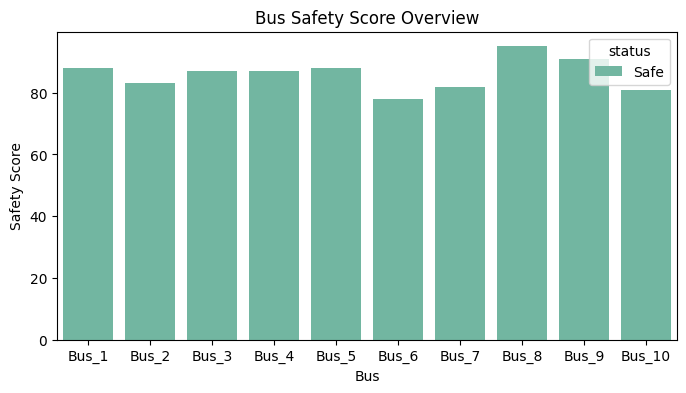

In [25]:
# Visualize safety scores
plt.figure(figsize=(8,4))
sns.barplot(x='bus_id', y='safety_score', hue='status', data=buses, palette='Set2')
plt.title("Bus Safety Score Overview")
plt.xlabel("Bus")
plt.ylabel("Safety Score")
plt.show()



C:\Users\USER\AppData\Local\Temp\ipykernel_9656\3939099542.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='route_risk_level', y='avg_speed_kmh', data=buses, order=['Low','Medium','High'], palette='Set2')


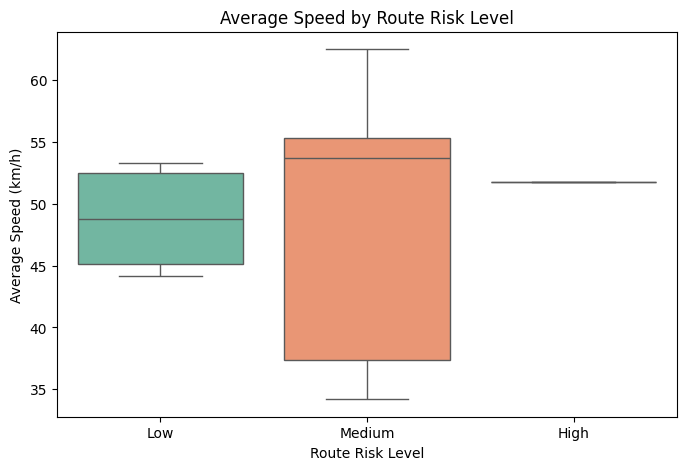

In [26]:
# Visualize average speed by route risk level
plt.figure(figsize=(8,5))   
sns.boxplot(x='route_risk_level', y='avg_speed_kmh', data=buses, order=['Low','Medium','High'], palette='Set2')
plt.title('Average Speed by Route Risk Level')
plt.xlabel('Route Risk Level')
plt.ylabel('Average Speed (km/h)')
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_9656\312213268.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='route_risk_level', data=buses, order=['Low','Medium','High'], palette='Set2')


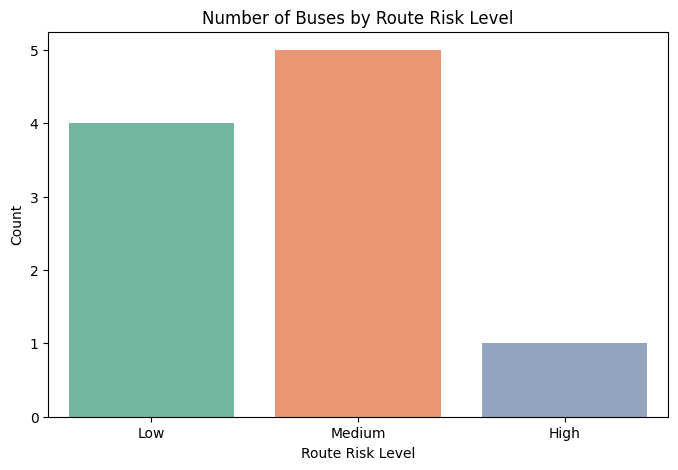

In [27]:
# Visualize route risk levels for each bus
plt.figure(figsize=(8,5))
sns.countplot(x='route_risk_level', data=buses, order=['Low','Medium','High'], palette='Set2')
plt.title('Number of Buses by Route Risk Level')    
plt.xlabel('Route Risk Level')
plt.ylabel('Count')
plt.show()


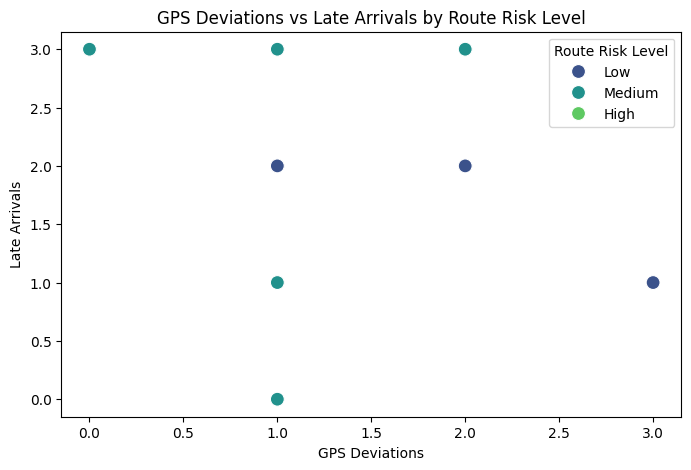

In [28]:
# Visualize GPS deviations and late arrivals by route risk level
plt.figure(figsize=(8,5))
sns.scatterplot(x='gps_deviations', y='late_arrivals', hue='route_risk_level', data=buses, palette='viridis', s=100)
plt.title('GPS Deviations vs Late Arrivals by Route Risk Level')
plt.xlabel('GPS Deviations')
plt.ylabel('Late Arrivals')
plt.legend(title='Route Risk Level')
plt.show()